<a href="https://colab.research.google.com/github/Yaccoub/Beams/blob/master/Yacoub_Dummy_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dummy Dataset Analysis


In [2]:
#!pip install --user laserbeamsize

     |████████████████████████████████| 778kB 6.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for laserbeamsize: filename=laserbeamsize-1.7.2-cp37-none-any.whl size=23610 sha256=2fdcafbbbd4c3b199ca4e5375a6afe7589410bff853a3b31700112f939033eef
  Stored in directory: /root/.cache/pip/wheels/47/c7/8e/6b8cb12f690e40845e50d59fdb9faf4d09faf606c0e53a13fa
Successfully built laserbeamsize


In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

try:
    import laserbeamsize as lbs

except ModuleNotFoundError:
    print('laserbeamsize is not installed. To install, uncomment and run the cell above.')
    print('Once installation is successful, rerun this cell again.')
    
pixel_size_µm = 3.75          # pixel size in microns for the camera
repo = "https://github.com/scottprahl/laserbeamsize/raw/master/docs/"

laserbeamsize is not installed. To install, uncomment and run the cell above.
Once installation is successful, rerun this cell again.


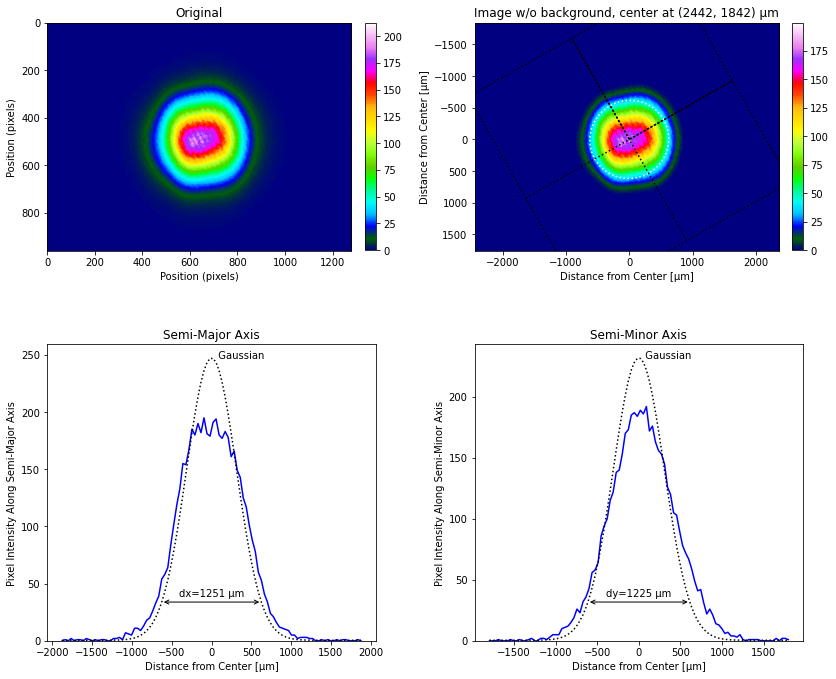

In [ ]:
beam = imageio.imread(repo + "t-hene.pgm")
lbs.beam_size_plot(beam, pixel_size = pixel_size_µm, units='µm')
plt.show()

Further analysis of this beam image can be found in the Jupyter notebook on the [razor blade technique](05-Razor-Blade.html)

In [ ]:
# array of distances at which images were collected
zz = np.array([168,210,280,348,414,480,495,510,520,580,666,770], dtype=float) * 1e-3 #m

# read them all into memory 
images = [imageio.imread(repo + "t-%dmm.pgm" % (z*1000)) for z in zz]

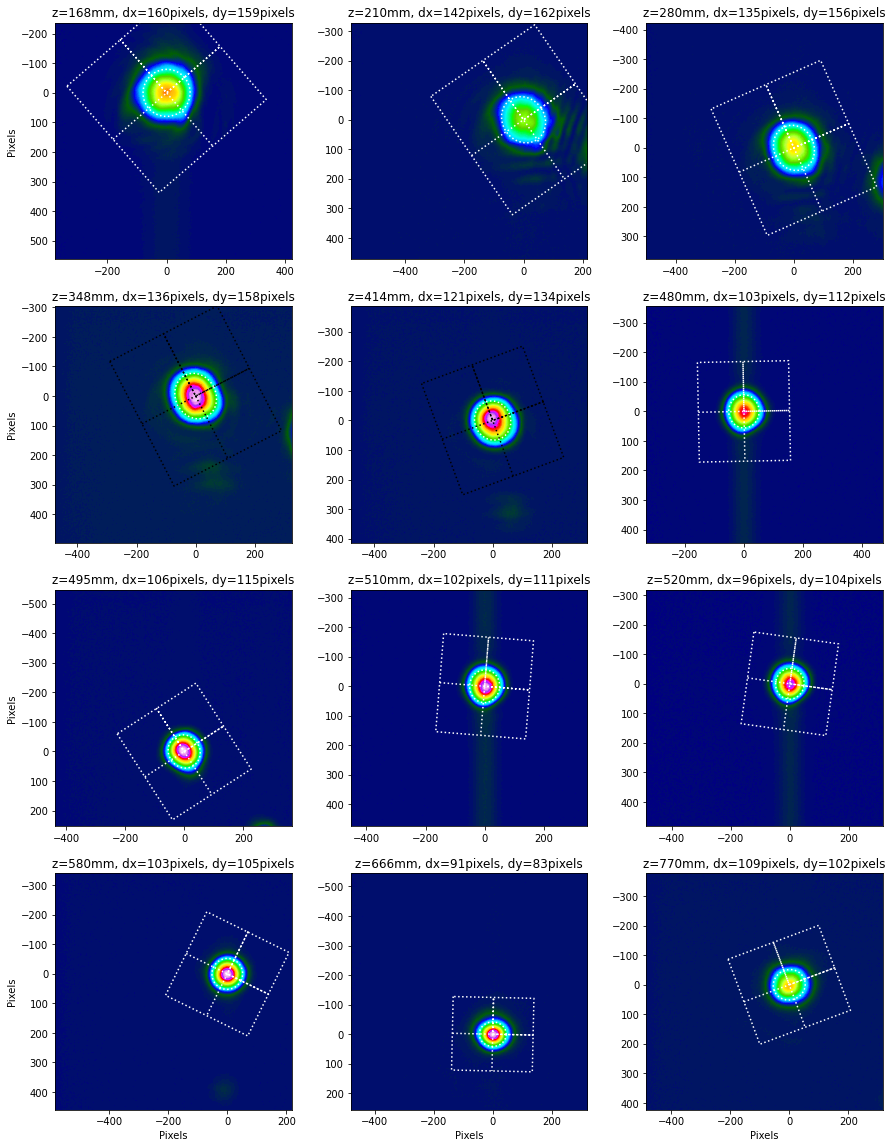

In [ ]:
dx, dy=lbs.beam_size_montage(images, z=zz)

Zoom in

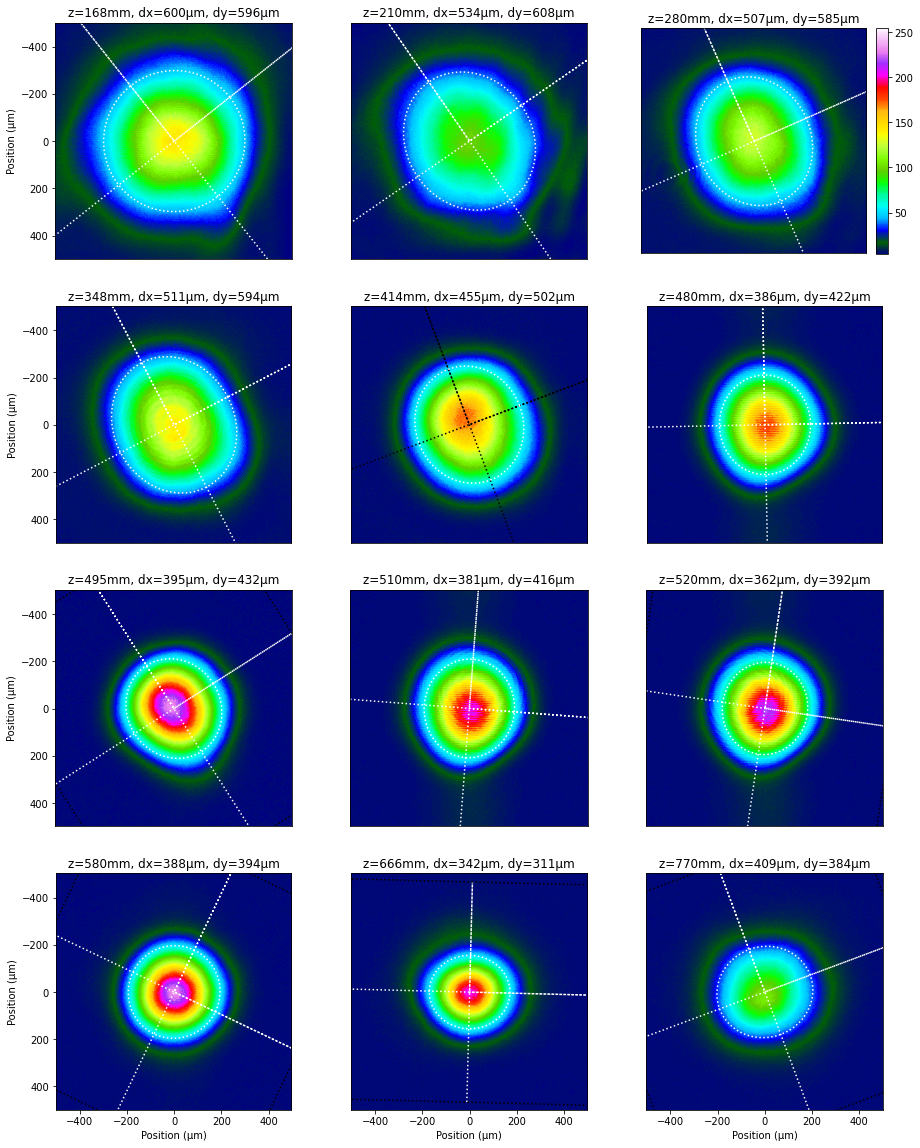

In [ ]:
options = {'z':zz,                      # beam_size_montage assumes z locations in meters
           'pixel_size':pixel_size_µm,  # convert pixels to microns
           'units': 'µm',               # define units
           'vmax':255,                  # use same colorbar 0-255 for all images 
           'crop':[1000,1000],          # crop to 2x2mm area around beam center
          }

dx,dy=lbs.beam_size_montage(images, **options)

In [ ]:
for image in images:
  x, y, dx, dy, phi = lbs.beam_size(image)
  print("The center of the beam ellipse is at (%.0f, %.0f)" % (x,y))
  print("The ellipse diameter (closest to horizontal) is %.0f pixels" % dx)
  print("The ellipse diameter (closest to   vertical) is %.0f pixels" % dy)
  print("The ellipse is rotated %.0f° ccw from horizontal" % (phi*180/3.1416))
  print("------------------------------------")


The center of the beam ellipse is at (376, 238)
The ellipse diameter (closest to horizontal) is 160 pixels
The ellipse diameter (closest to   vertical) is 159 pixels
The ellipse is rotated 41° ccw from horizontal
------------------------------------
The center of the beam ellipse is at (585, 329)
The ellipse diameter (closest to horizontal) is 142 pixels
The ellipse diameter (closest to   vertical) is 162 pixels
The ellipse is rotated 35° ccw from horizontal
------------------------------------
The center of the beam ellipse is at (500, 424)
The ellipse diameter (closest to horizontal) is 135 pixels
The ellipse diameter (closest to   vertical) is 156 pixels
The ellipse is rotated 24° ccw from horizontal
------------------------------------
The center of the beam ellipse is at (475, 304)
The ellipse diameter (closest to horizontal) is 136 pixels
The ellipse diameter (closest to   vertical) is 158 pixels
The ellipse is rotated 27° ccw from horizontal
------------------------------------


The algorithm locates each beam and produces plausible beam diameters.  When the dotted rectangle is not entirely enclosed in the image (as in the first two images) then the diameters are suspect.  I talk more about this in the M² notebooks.

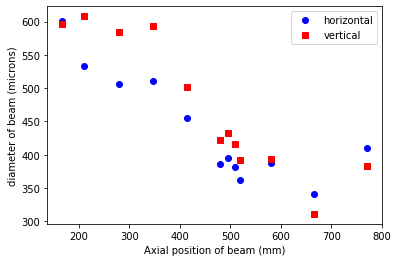

In [ ]:
plt.plot(zz*1000,dx,'ob',label='horizontal')
plt.plot(zz*1000,dy,'sr',label='vertical')
plt.legend()
plt.xlabel('Axial position of beam (mm)')
plt.ylabel('diameter of beam (microns)')
plt.show()